In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\dell\\OneDrive\\Desktop\\Data Project file\\Deep Learning projects'

In [3]:
df=pd.read_csv('Social_Media_Ads_Dataset_Week 2.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Since User id is not used, dropping the column

In [7]:
df.drop(columns=['User ID', 'Gender'], axis=1, inplace=True)

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No Null values in the dataset

In [10]:
#Converting gender column from categorical value to numerical values
#df['Gender'] = (df['Gender'] == 'Male').astype(int)

In [10]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Developing logistic regression from sklearn 

In [11]:
#Importing required libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Defining the features 
X = df.drop(columns=['Purchased'], axis=1)
y = df['Purchased']

In [13]:
# standardizing the data
scalar = StandardScaler()
X_scaled= scalar.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, shuffle=True )

In [15]:
model_lr= LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model_lr.predict(X_test)

In [17]:
print(f' Model accuracy {accuracy_score(y_test, y_pred)}')

 Model accuracy 0.75


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        44
           1       0.81      0.58      0.68        36

    accuracy                           0.75        80
   macro avg       0.76      0.73      0.74        80
weighted avg       0.76      0.75      0.74        80



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


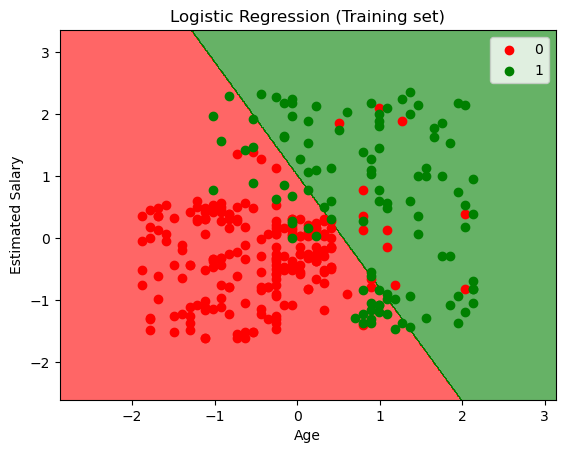

In [19]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


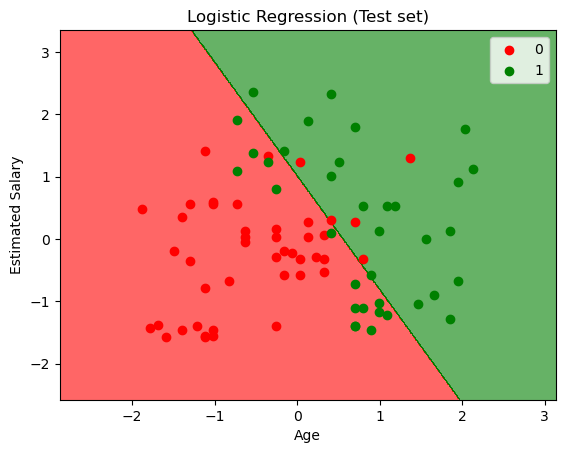

In [21]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [43]:
print('*'*80)

********************************************************************************


## Developing logistic regression from scratch

In [22]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [39]:
X_train = (X_train.T)

In [29]:

y_train = np.array(y_train).reshape(-1,1)

In [33]:
y_train = y_train.T # taking transpose 

In [35]:
X_test = X_test.T
y_test = np.array(y_test).reshape(-1,1)

In [37]:
y_test =  y_test.T

In [40]:
print("Shape of the X_train", X_train.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (2, 320)
Shape of the y_train (1, 320)
Shape of the X_test (2, 80)
Shape of the y_test (1, 80)


In [41]:
# define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [46]:
# defining the model
def model(X, y, learning_rate, iterations):
    
    m = X_train.shape[1] # no of observations
    n = X_train.shape[0] # no of features
    
    W = np.zeros((n,1)) # initial values of parameters are zeros
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X)+B
        A = sigmoid(Z) # probabilistic prediction
        
        cost = -(1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
        
        dW = (1/m)*np.dot(A-y, X.T)
        dB = (1/m)*np.sum(A-y)
        
        W = W-learning_rate*dW.T
        B = B-learning_rate*dB
        
        cost_list.append(cost)
        
        if (i%(iterations/10) == 0):
            print('cost after', i, 'iteration is: ', cost)
        
    return W, B, cost_list
        

In [47]:
iterations=10000
learning_rate=0.005
W, B, cost_list=model(X_train, y_train, learning_rate=learning_rate, iterations=iterations)

cost after 0 iteration is:  0.6931471805599454
cost after 1000 iteration is:  0.4210833401154176
cost after 2000 iteration is:  0.3715914944724761
cost after 3000 iteration is:  0.35319213955409606
cost after 4000 iteration is:  0.34425103508994054
cost after 5000 iteration is:  0.33927338488523484
cost after 6000 iteration is:  0.33626630936357077
cost after 7000 iteration is:  0.334348599727641
cost after 8000 iteration is:  0.33307793266945107
cost after 9000 iteration is:  0.33221187579009714


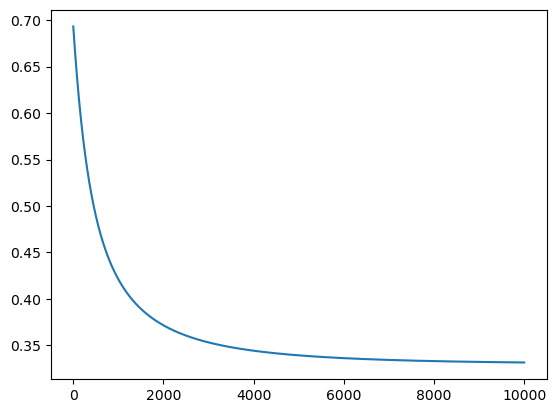

In [48]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [49]:
def accuracy(X, y, W, B):
    
    Z = np.dot(W.T, X)+B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1-np.sum(np.absolute(A-y)/y.shape[1]))*100
    
    print('Accuracy of the model is: ', acc, '%')

In [50]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is:  75.0 %


In [60]:
def predict(X, W, B):
    
    y_hat=[]
    Z = np.dot(W.T, X)+B
    A = sigmoid(Z)
    
    y_hat.append(A)
    #for i in range(X.shape[1]):
    #    if A.all > 0.5:
    #        A[i] == 1
     #   elif A.all < 0.5:
     #       A[i] == 0
            
    
        
    return y_hat
    

In [61]:
predict(X_test, W, B)

[array([[0.87755485, 0.43543837, 0.94823728, 0.65598855, 0.45770658,
         0.99086351, 0.61083133, 0.10173259, 0.78925787, 0.9633758 ,
         0.08574058, 0.77842838, 0.33525058, 0.00167382, 0.74688533,
         0.85403463, 0.1153775 , 0.31777957, 0.78550465, 0.14524757,
         0.54025472, 0.0652398 , 0.89675666, 0.7981965 , 0.6726663 ,
         0.15047697, 0.00582748, 0.07088237, 0.13384617, 0.00287848,
         0.71032284, 0.91941972, 0.37185296, 0.01157015, 0.53997886,
         0.0237869 , 0.21155573, 0.0100379 , 0.07798817, 0.41396636,
         0.00461852, 0.39371628, 0.01024061, 0.30006061, 0.00460222,
         0.36082728, 0.19242613, 0.42613157, 0.26452478, 0.27316294,
         0.06736954, 0.99472937, 0.27457547, 0.02409289, 0.18804951,
         0.76096556, 0.39966597, 0.31676971, 0.89861177, 0.51780516,
         0.11368928, 0.006457  , 0.00476254, 0.98270214, 0.38916934,
         0.15996278, 0.03408189, 0.17933078, 0.38437876, 0.29857094,
         0.00132542, 0.01290217, 0

## Conclusion:

Comparing both models the accuracy is matching. Therfore, developed model from scratch is workig good. 